<a href="https://colab.research.google.com/github/dharshini-in/-Singapore-Resale-Flat-Prices-Predicting/blob/main/Singapore_resale_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob
import pickle

In [2]:
df1=pd.read_csv(r"/content/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66884 entries, 0 to 66883
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                66884 non-null  object 
 1   town                 66884 non-null  object 
 2   flat_type            66883 non-null  object 
 3   block                66883 non-null  object 
 4   street_name          66883 non-null  object 
 5   storey_range         66883 non-null  object 
 6   floor_area_sqm       66883 non-null  float64
 7   flat_model           66883 non-null  object 
 8   lease_commence_date  66883 non-null  float64
 9   resale_price         66883 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.1+ MB


In [3]:
df2=pd.read_csv(r"/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012 (1).csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66211 entries, 0 to 66210
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                66211 non-null  object 
 1   town                 66211 non-null  object 
 2   flat_type            66210 non-null  object 
 3   block                66210 non-null  object 
 4   street_name          66210 non-null  object 
 5   storey_range         66210 non-null  object 
 6   floor_area_sqm       66210 non-null  float64
 7   flat_model           66210 non-null  object 
 8   lease_commence_date  66210 non-null  float64
 9   resale_price         66210 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.1+ MB


In [4]:
df3=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [5]:
df4=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [6]:
df5=pd.read_csv(r"/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64471 entries, 0 to 64470
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                64471 non-null  object 
 1   town                 64471 non-null  object 
 2   flat_type            64471 non-null  object 
 3   block                64471 non-null  object 
 4   street_name          64471 non-null  object 
 5   storey_range         64470 non-null  object 
 6   floor_area_sqm       64470 non-null  float64
 7   flat_model           64470 non-null  object 
 8   lease_commence_date  64470 non-null  float64
 9   remaining_lease      64470 non-null  object 
 10  resale_price         64470 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.4+ MB


In [7]:
#d4 and d5 have ramining lease column so first we concat them and merge with rem datasets
df_doop=pd.concat([df1,df2,df3], ignore_index=True)
df_doop

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0
...,...,...,...,...,...,...,...,...,...,...
185293,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988.0,580000.0
185294,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988.0,540000.0
185295,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992.0,738000.0
185296,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985.0,592000.0


In [8]:
df_doop1=pd.concat([df4,df5], ignore_index=True)
df_doop1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986.0,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981.0,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980.0,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979.0,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980.0,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
101619,2020-01,BISHAN,4 ROOM,285,BISHAN ST 22,13 TO 15,108.0,Model A,1992.0,71 years 06 months,670000.0
101620,2020-01,BISHAN,4 ROOM,226,BISHAN ST 23,07 TO 09,102.0,Model A,1992.0,71 years 03 months,555000.0
101621,2020-01,BISHAN,4 ROOM,214,BISHAN ST 23,04 TO 06,103.0,Model A,1992.0,71 years 03 months,485000.0
101622,2020-01,BISHAN,4 ROOM,273A,BISHAN ST 24,28 TO 30,95.0,DBSS,2011.0,90 years 08 months,888888.0


In [9]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_doop1["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [10]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [13]:
df_data.isnull()

,remaining_lease_year,remaining_lease_month
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
101619,False,False
101620,False,False
101621,False,False
101622,False,False


In [15]:
# Replace non-integer values with NaN
df_data["remaining_lease_year"] = df_data["remaining_lease_year"].replace("[^0-9]", np.nan, regex=True).astype(float)
df_data["remaining_lease_month"] = df_data["remaining_lease_month"].replace("[^0-9]", np.nan, regex=True).astype(float)

# Convert the columns to integer type
df_data["remaining_lease_year"] = df_data["remaining_lease_year"].fillna(0).astype(int)
df_data["remaining_lease_month"] = df_data["remaining_lease_month"].fillna(0).astype(int)

In [16]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [17]:
#droping the "remaining_lease" column
df_doop1.drop(columns=["remaining_lease"],inplace= True)

In [18]:
df_doop2= pd.concat([df_doop1,df_data],axis=1)

In [19]:
df_doop2= pd.concat([df_doop1,df_data],axis=1)

In [20]:
df_doop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101624 entries, 0 to 101623
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  101624 non-null  object 
 1   town                   101624 non-null  object 
 2   flat_type              101624 non-null  object 
 3   block                  101624 non-null  object 
 4   street_name            101624 non-null  object 
 5   storey_range           101623 non-null  object 
 6   floor_area_sqm         101623 non-null  float64
 7   flat_model             101623 non-null  object 
 8   lease_commence_date    101623 non-null  float64
 9   resale_price           101623 non-null  float64
 10  remaining_lease_year   101624 non-null  int64  
 11  remaining_lease_month  101624 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 9.3+ MB


In [21]:
#now we are merging all datasets and moving for data cleaning process
df=pd.concat([df_doop,df_doop2], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,NaN,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,NaN,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,NaN,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,NaN,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
286917,2020-01,BISHAN,4 ROOM,285,BISHAN ST 22,13 TO 15,108.0,Model A,1992.0,670000.0,71.0,6.0
286918,2020-01,BISHAN,4 ROOM,226,BISHAN ST 23,07 TO 09,102.0,Model A,1992.0,555000.0,71.0,3.0
286919,2020-01,BISHAN,4 ROOM,214,BISHAN ST 23,04 TO 06,103.0,Model A,1992.0,485000.0,71.0,3.0
286920,2020-01,BISHAN,4 ROOM,273A,BISHAN ST 24,28 TO 30,95.0,DBSS,2011.0,888888.0,90.0,8.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286922 entries, 0 to 286921
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  286922 non-null  object 
 1   town                   286922 non-null  object 
 2   flat_type              286920 non-null  object 
 3   block                  286920 non-null  object 
 4   street_name            286920 non-null  object 
 5   storey_range           286919 non-null  object 
 6   floor_area_sqm         286919 non-null  float64
 7   flat_model             286919 non-null  object 
 8   lease_commence_date    286919 non-null  float64
 9   resale_price           286919 non-null  float64
 10  remaining_lease_year   101624 non-null  float64
 11  remaining_lease_month  101624 non-null  float64
dtypes: float64(5), object(7)
memory usage: 26.3+ MB


In [23]:
df.isnull().sum()

month                         0
town                          0
flat_type                     2
block                         2
street_name                   2
storey_range                  3
floor_area_sqm                3
flat_model                    3
lease_commence_date           3
resale_price                  3
remaining_lease_year     185298
remaining_lease_month    185298
dtype: int64

In [24]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease_year']=df['remaining_lease_year'].fillna(df['remaining_lease_year'].mean())
df['remaining_lease_month']=df['remaining_lease_month'].fillna(df['remaining_lease_month'].mean())
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month
286917,2020-01,BISHAN,4 ROOM,285,BISHAN ST 22,13 TO 15,108.0,Model A,1992.0,670000.0,71.0,6.0
286918,2020-01,BISHAN,4 ROOM,226,BISHAN ST 23,07 TO 09,102.0,Model A,1992.0,555000.0,71.0,3.0
286919,2020-01,BISHAN,4 ROOM,214,BISHAN ST 23,04 TO 06,103.0,Model A,1992.0,485000.0,71.0,3.0
286920,2020-01,BISHAN,4 ROOM,273A,BISHAN ST 24,28 TO 30,95.0,DBSS,2011.0,888888.0,90.0,8.0
286921,2020-01,BISHAN,5 ROOM,103,BISHAN ST,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [25]:
df.isnull().sum()

month                    0
town                     0
flat_type                2
block                    2
street_name              2
storey_range             3
floor_area_sqm           3
flat_model               3
lease_commence_date      3
resale_price             3
remaining_lease_year     0
remaining_lease_month    0
dtype: int64

In [29]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

#droping the "street_name" and "block"
df= df.drop(columns=["block","street_name"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286922 entries, 0 to 286921
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  286922 non-null  object 
 1   town                   286922 non-null  object 
 2   flat_type              286920 non-null  object 
 3   storey_range           286919 non-null  object 
 4   floor_area_sqm         286919 non-null  float64
 5   flat_model             286919 non-null  object 
 6   lease_commence_date    286919 non-null  float64
 7   resale_price           286919 non-null  float64
 8   remaining_lease_year   286922 non-null  float64
 9   remaining_lease_month  286922 non-null  float64
 10  address                286920 non-null  object 
dtypes: float64(5), object(6)
memory usage: 24.1+ MB


In [30]:
# we need to convert all the object datatype to respective datatype for correlation
#Month column

# for month
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

#spliting the month column to "Year", "month", "day"
df["year"]= df["month"].dt.year
df["month"]= df["month"].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286922 entries, 0 to 286921
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  286922 non-null  int64  
 1   town                   286922 non-null  object 
 2   flat_type              286920 non-null  object 
 3   storey_range           286919 non-null  object 
 4   floor_area_sqm         286919 non-null  float64
 5   flat_model             286919 non-null  object 
 6   lease_commence_date    286919 non-null  float64
 7   resale_price           286919 non-null  float64
 8   remaining_lease_year   286922 non-null  float64
 9   remaining_lease_month  286922 non-null  float64
 10  address                286920 non-null  object 
 11  year                   286922 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 26.3+ MB


In [31]:
# Split the 'Range' column into lower and upper bounds
df[['storey_start', 'storey_end']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_start'] = pd.to_numeric(df['storey_start'])
df['storey_end'] = pd.to_numeric(df['storey_end'])

#drop the storey range in that column
df.drop('storey_range', axis = 1, inplace= True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286922 entries, 0 to 286921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  286922 non-null  int64  
 1   town                   286922 non-null  object 
 2   flat_type              286920 non-null  object 
 3   floor_area_sqm         286919 non-null  float64
 4   flat_model             286919 non-null  object 
 5   lease_commence_date    286919 non-null  float64
 6   resale_price           286919 non-null  float64
 7   remaining_lease_year   286922 non-null  float64
 8   remaining_lease_month  286922 non-null  float64
 9   address                286920 non-null  object 
 10  year                   286922 non-null  int64  
 11  storey_start           286919 non-null  float64
 12  storey_end             286919 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 28.5+ MB


In [33]:
#now 4 columns have object type i.e(town,flat_type,address,flat_model)
df['town'].value_counts()

TAMPINES           24125
BEDOK              21836
JURONG WEST        21025
YISHUN             20755
WOODLANDS          19479
ANG MO KIO         18288
HOUGANG            14675
BUKIT BATOK        13465
BUKIT MERAH        11623
SENGKANG           10741
TOA PAYOH          10608
CHOA CHU KANG       9957
QUEENSTOWN          9256
CLEMENTI            9166
GEYLANG             9129
KALLANG/WHAMPOA     9026
PASIR RIS           8681
BUKIT PANJANG       7748
JURONG EAST         7580
PUNGGOL             7001
SERANGOON           6962
BISHAN              5889
SEMBAWANG           3993
MARINE PARADE       2588
CENTRAL AREA        2556
BUKIT TIMAH          743
LIM CHU KANG          25
CL                     1
W                      1
Name: town, dtype: int64

In [34]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS', 'CL',
       'W', 'PUNGGOL'], dtype=object)

In [35]:
df["town"].nunique()

29

In [36]:
df['flat_type'].value_counts()

4 ROOM              106413
3 ROOM               95772
5 ROOM               59284
EXECUTIVE            21082
2 ROOM                3760
1 ROOM                 421
MULTI-GENERATION        99
MULTI GENERATION        89
Name: flat_type, dtype: int64

In [37]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [38]:
df['flat_type'].value_counts()
# now multi generation problem solved

4 ROOM              106413
3 ROOM               95772
5 ROOM               59284
EXECUTIVE            21082
2 ROOM                3760
1 ROOM                 421
MULTI GENERATION       188
Name: flat_type, dtype: int64

In [39]:
df["flat_type"].nunique()

7

In [40]:
df['flat_model'].value_counts()

Model A                   66890
Improved                  56286
New Generation            40232
NEW GENERATION            22258
IMPROVED                  18693
Premium Apartment         15533
Simplified                12482
MODEL A                   11296
Apartment                  9184
Standard                   8071
Maisonette                 6151
STANDARD                   5710
SIMPLIFIED                 4445
MAISONETTE                 3100
Model A2                   2554
DBSS                       1222
APARTMENT                   885
Adjoined flat               394
Model A-Maisonette          359
MODEL A-MAISONETTE          304
Type S1                     255
Terrace                     128
Type S2                     118
Multi Generation             99
MULTI GENERATION             89
TERRACE                      82
Improved-Maisonette          32
Premium Maisonette           32
IMPROVED-MAISONETTE          15
Premium Apartment Loft       12
2-ROOM                        6
2-room  

In [41]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [42]:
df['flat_model'].value_counts()

Model A                   78186
Improved                  74979
New Generation            62490
Simplified                16927
Premium Apartment         15533
Standard                  13781
Apartment                 10069
Maisonette                 9251
Model A2                   2554
DBSS                       1222
Model A-Maisonette          663
Adjoined flat               394
Type S1                     255
Terrace                     210
Multi Generation            188
Type S2                     118
Improved-Maisonette          47
Premium Maisonette           32
Premium Apartment Loft       12
2-room                        8
Name: flat_model, dtype: int64

In [43]:
df["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation', nan,
       'Adjoined flat', 'Premium Apartment', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft'],
      dtype=object)

In [44]:
df["flat_model"].nunique()

20

In [45]:
df["address"].nunique()

9133

In [46]:
#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [47]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df["town"]= LabelEncoder().fit_transform(df["town"])
df["flat_model"]= OrdinalEncoder().fit_transform(df[["flat_model"]])
df["flat_type"]= OrdinalEncoder().fit_transform(df[["flat_type"]])
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df["address"]= LabelEncoder().fit_transform(df["address"])

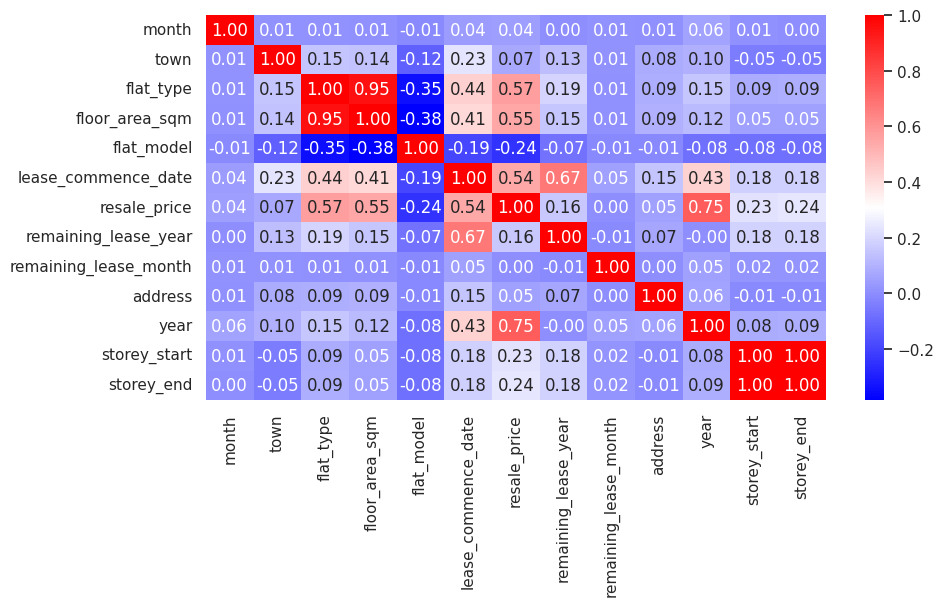

In [48]:
# Checking the Correlation using heatmap

df_corr= df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot= True, cmap="bwr", fmt=".2f")
plt.show()

In [49]:
# checking the duplicate values
df.duplicated().sum()

885

In [50]:
df_original= df.drop_duplicates()
df_original.reset_index(drop= True, inplace= True)

In [51]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns
df_og= df_original.drop(columns=["month","address"])
df_og.tail(2)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,year,storey_start,storey_end
286035,2,3.0,95.0,3.0,2011.0,888888.0,90.0,8.0,2020,28.0,30.0
286036,2,4.0,NaN,NaN,NaN,NaN,0.0,0.0,2020,NaN,NaN


In [53]:
df_og.isnull().sum()
df_og.isin([np.inf, -np.inf]).sum()

town                     0
flat_type                0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
remaining_lease_year     0
remaining_lease_month    0
year                     0
storey_start             0
storey_end               0
dtype: int64

In [54]:
df_og = df_og.dropna()  # Drop rows with missing values
df_og = df_og[~df_og.isin([np.inf, -np.inf])]  # Drop rows with infinite values

In [55]:
df_og["remaining_lease_year"]= df_og["remaining_lease_year"].astype(int)
df_og["remaining_lease_month"]= df_og["remaining_lease_month"].astype(int)
df_og["flat_type"]= df_og["flat_type"].astype(int)
df_og["flat_model"]= df_og["flat_model"].astype(int)
df_og["storey_start"]= df_og["storey_start"].astype(int)
df_og["storey_end"]= df_og["storey_end"].astype(int)
df_og["floor_area_sqm"]= df_og["floor_area_sqm"].astype(int)

df_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286034 entries, 0 to 286035
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   town                   286034 non-null  int64  
 1   flat_type              286034 non-null  int64  
 2   floor_area_sqm         286034 non-null  int64  
 3   flat_model             286034 non-null  int64  
 4   lease_commence_date    286034 non-null  float64
 5   resale_price           286034 non-null  float64
 6   remaining_lease_year   286034 non-null  int64  
 7   remaining_lease_month  286034 non-null  int64  
 8   year                   286034 non-null  int64  
 9   storey_start           286034 non-null  int64  
 10  storey_end             286034 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 26.2 MB


In [56]:
# set the columns
df_og1= df_og[['year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [57]:
df_real_og=df_og1.sort_values(by=["year"])

In [58]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

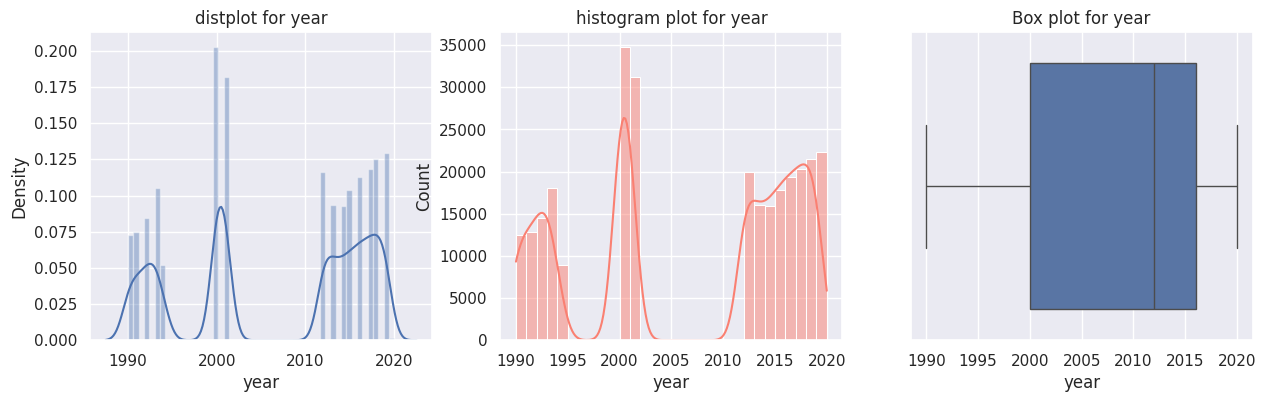

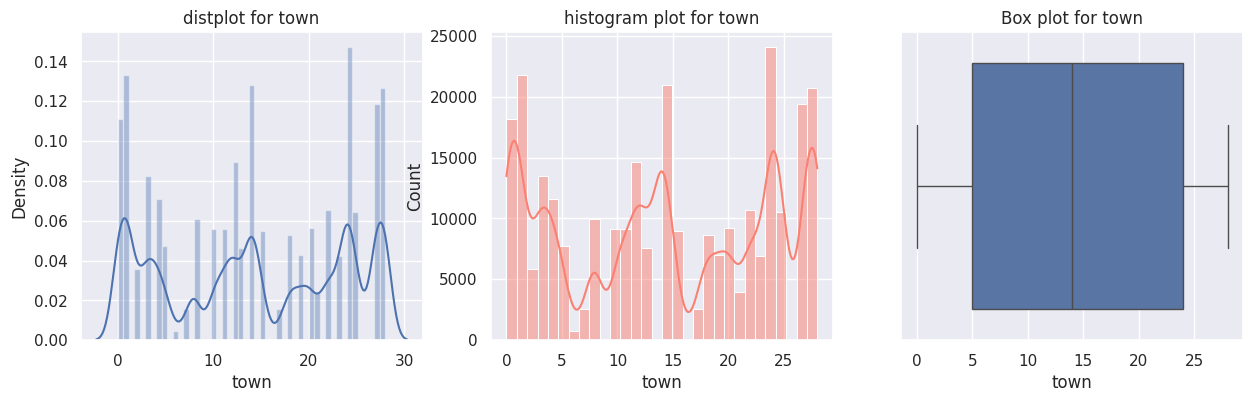

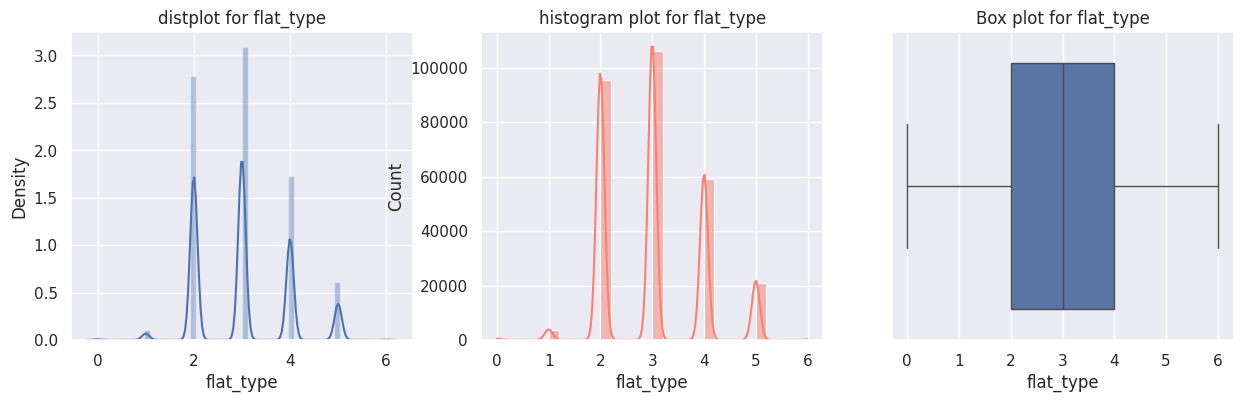

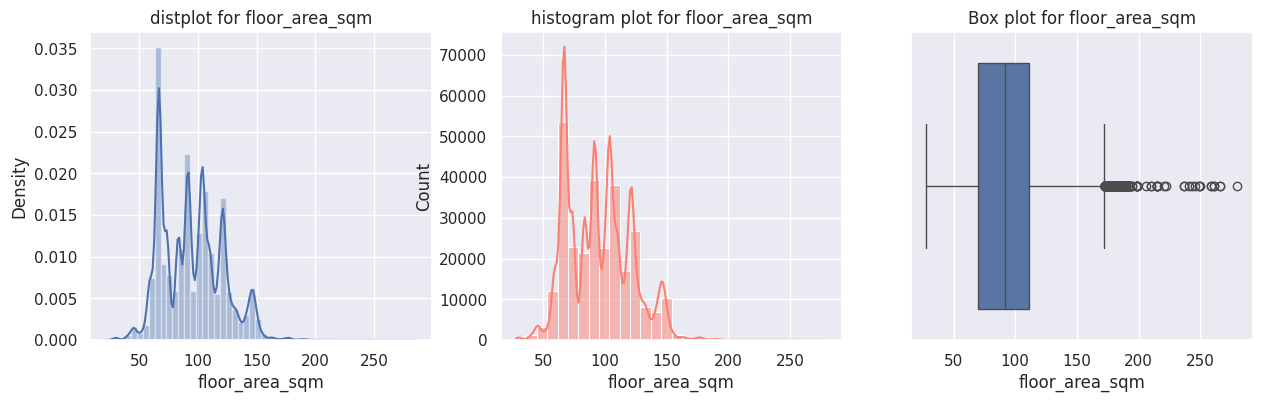

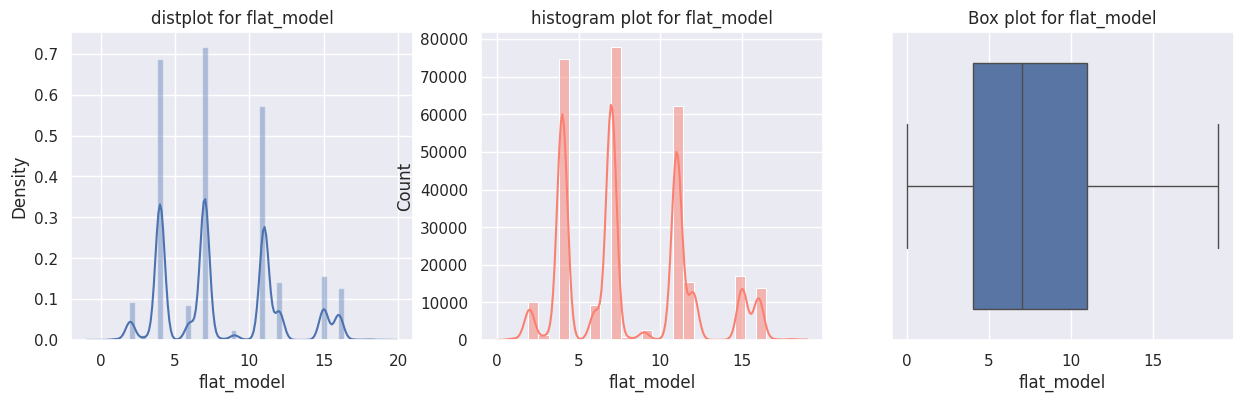

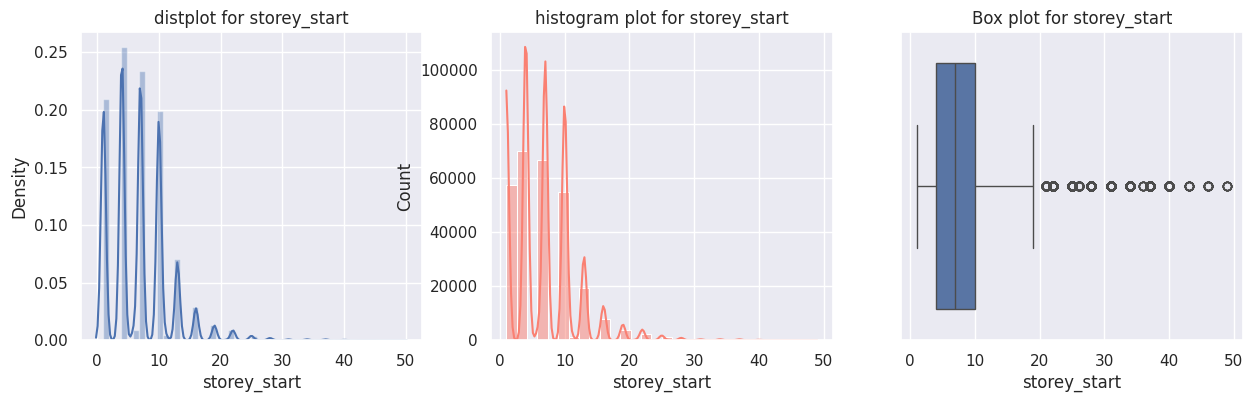

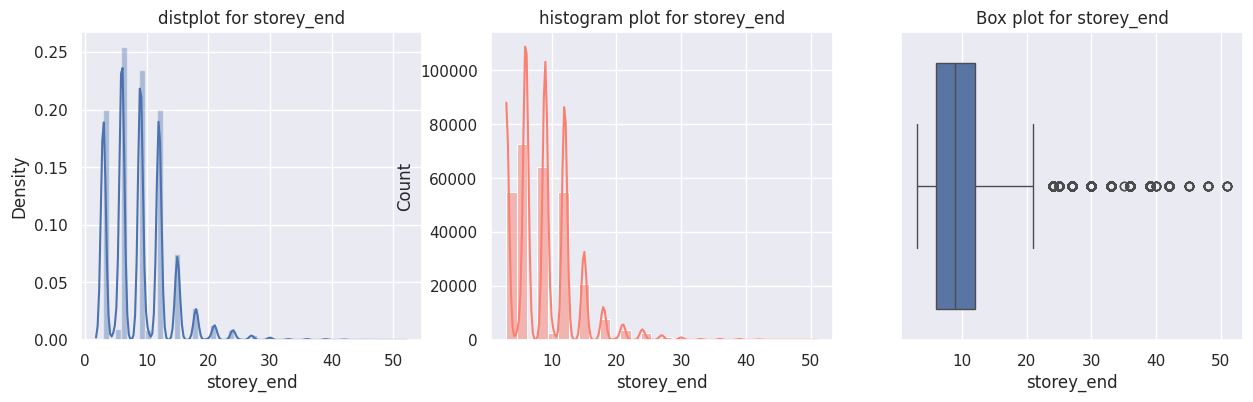

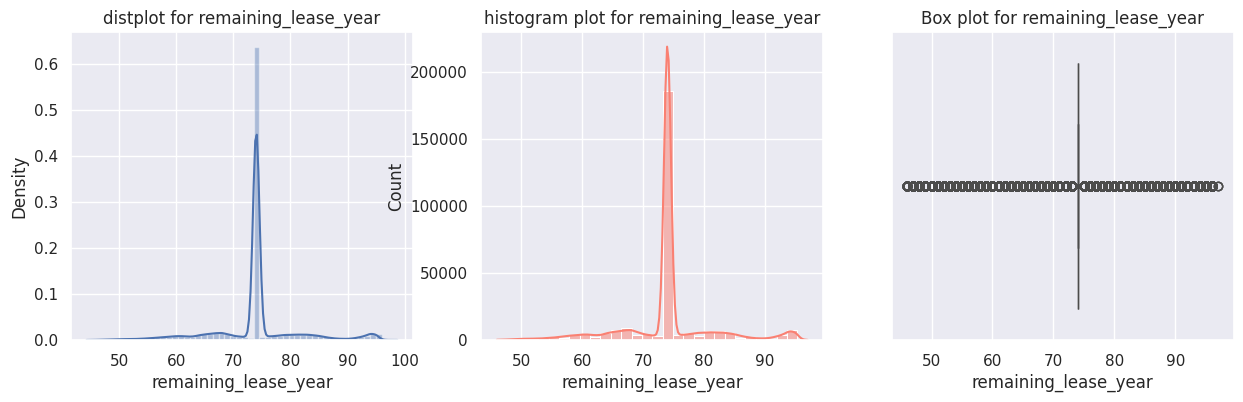

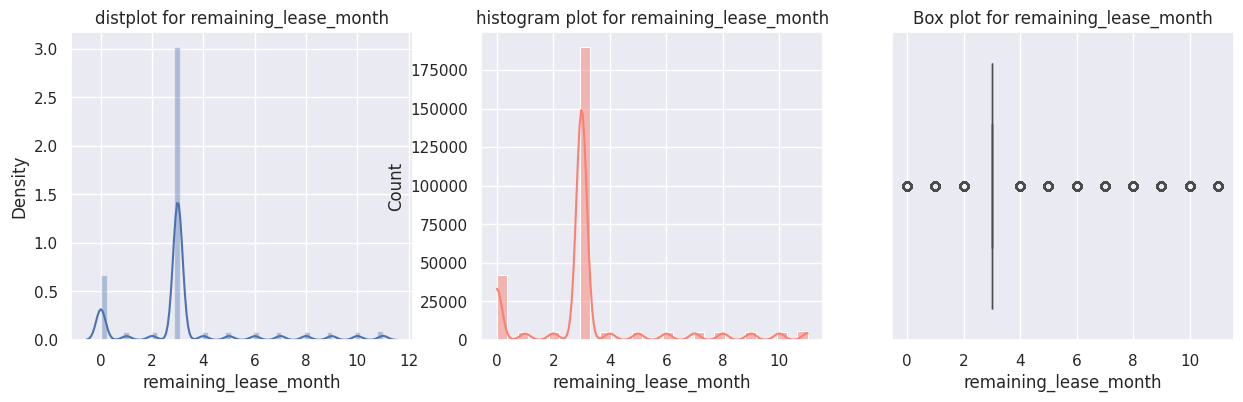

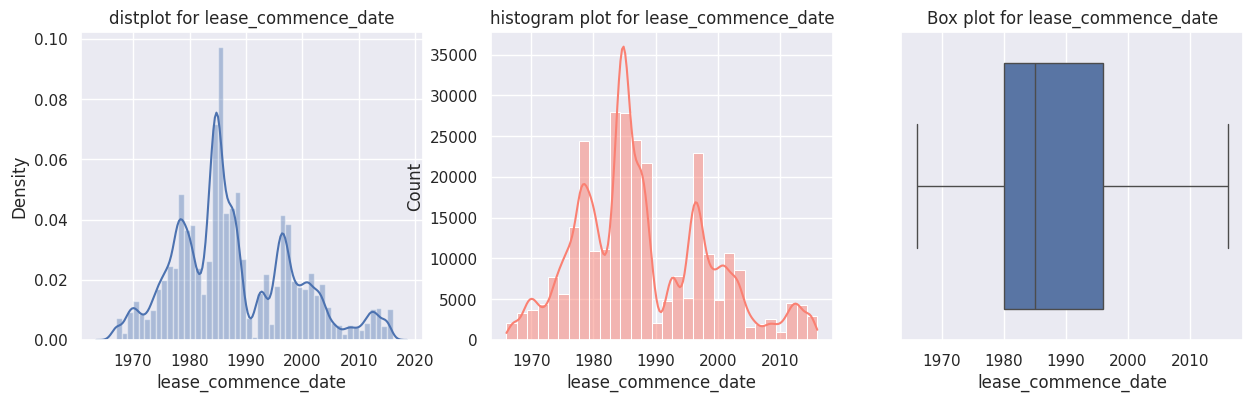

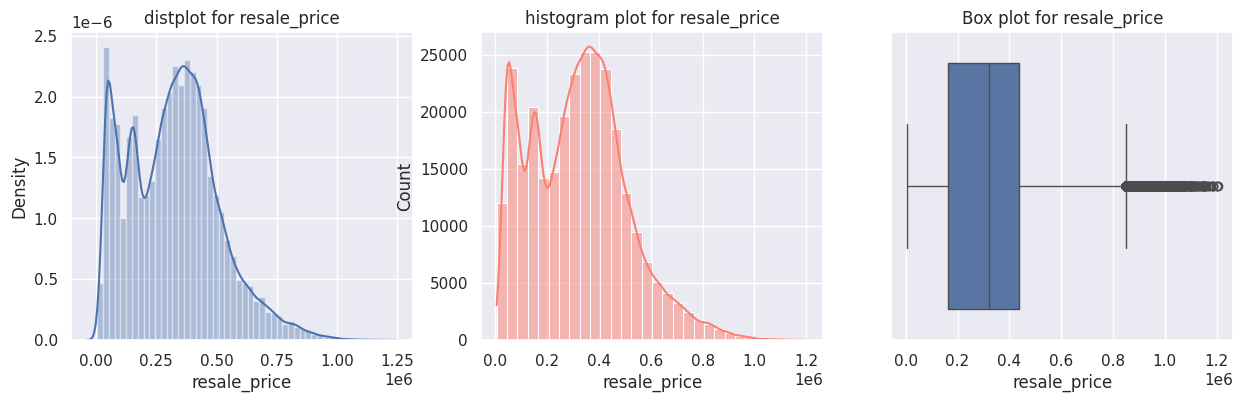

In [59]:
for i in df_real_og.columns:
    plot(df_real_og,i)

In [60]:
df_real_og["storey_start"]= np.log(df_real_og["storey_start"])
df_real_og["storey_end"]= np.log(df_real_og["storey_end"])
df_real_og["resale_price"]= np.log(df_real_og["resale_price"])

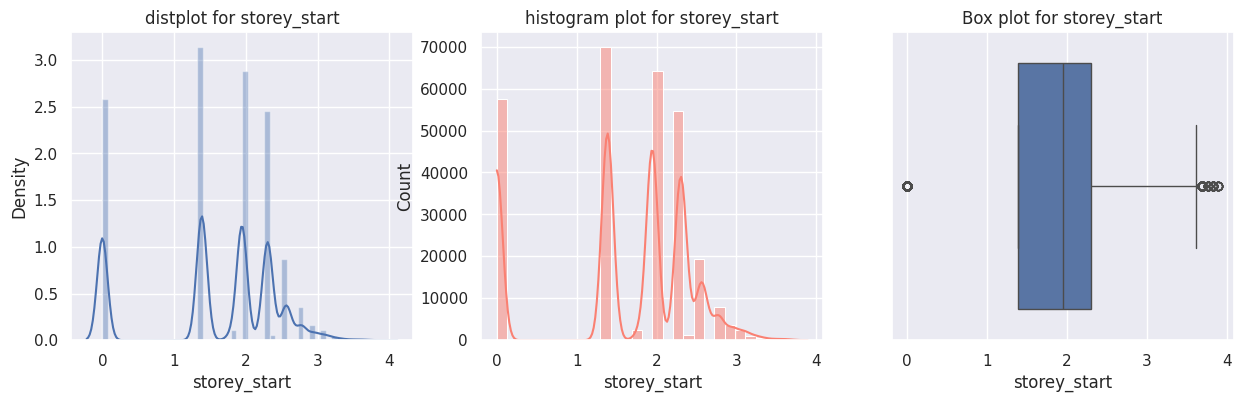

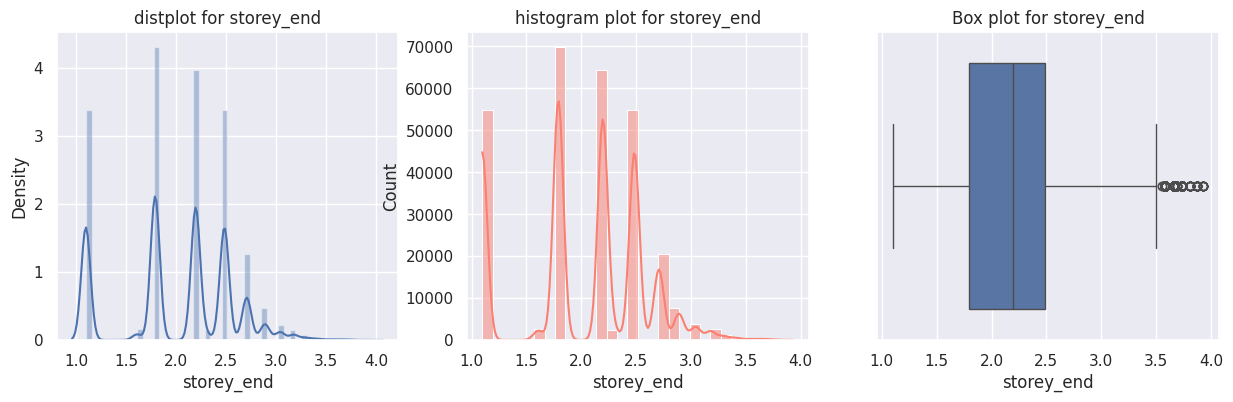

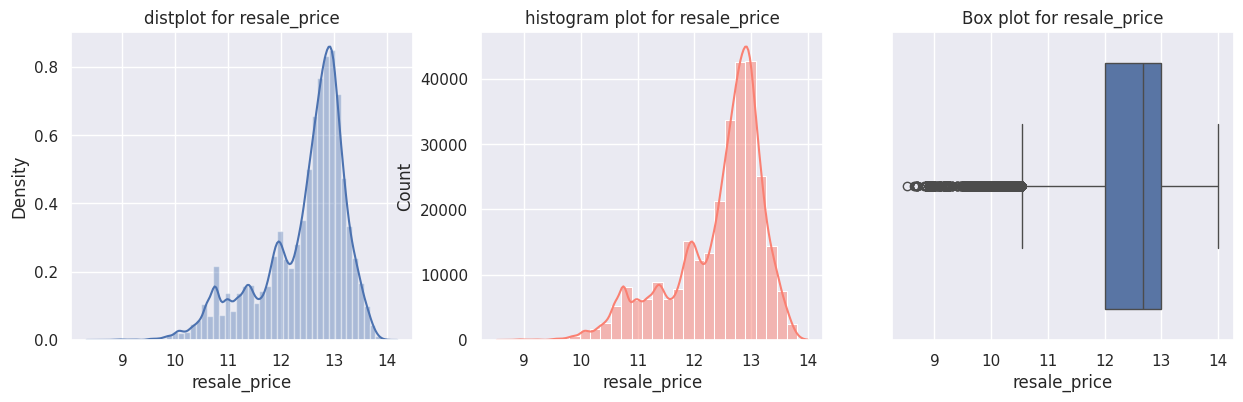

In [61]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_real_og,i)

In [63]:
def outlier(df_real_og,column):
  q1= df_real_og[column].quantile(0.25)
  q3= df_real_og[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df_real_og[column]= df_real_og[column].clip(lower_threshold, upper_threshold)
outlier_columns=["floor_area_sqm","remaining_lease_year","remaining_lease_month","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_real_og,j)

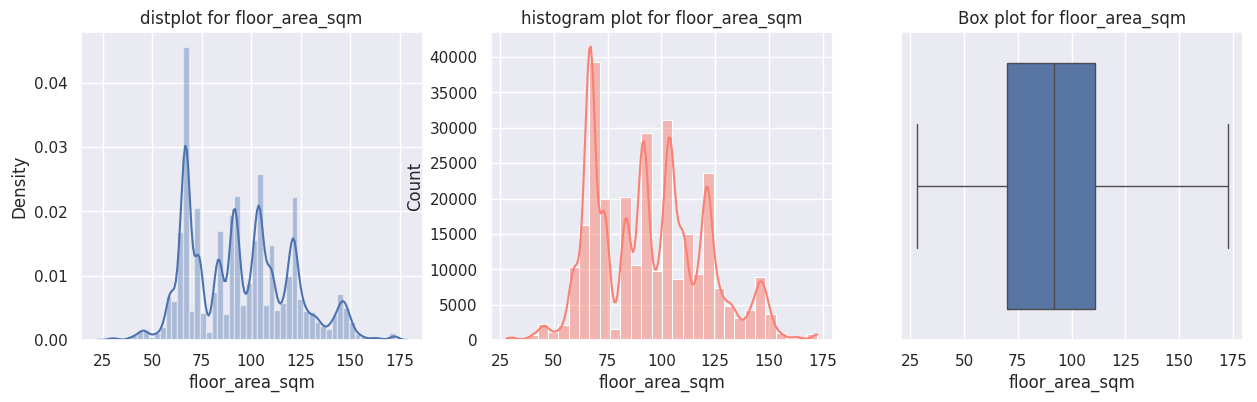

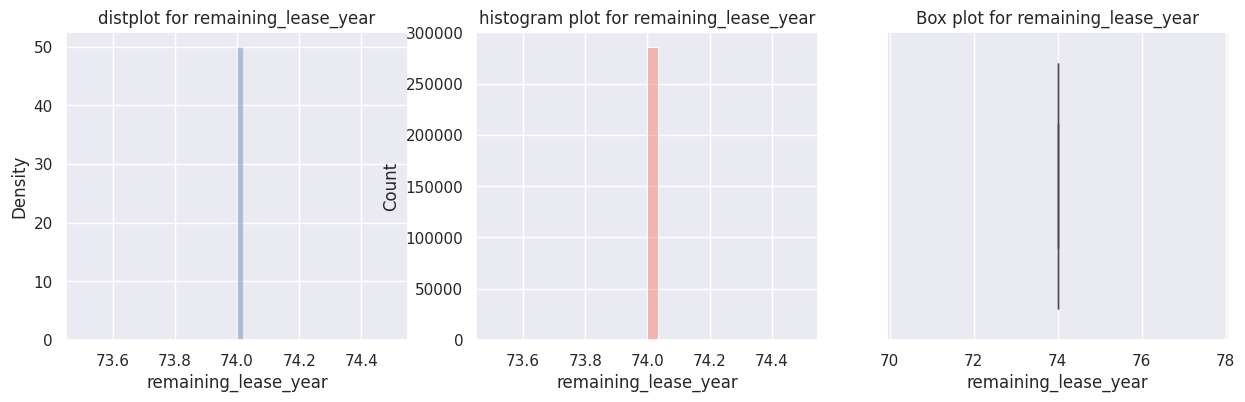

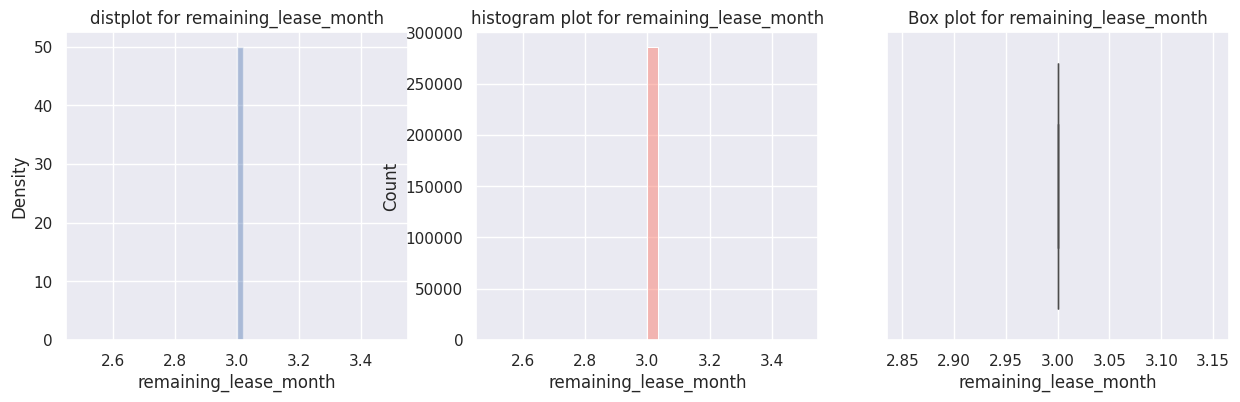

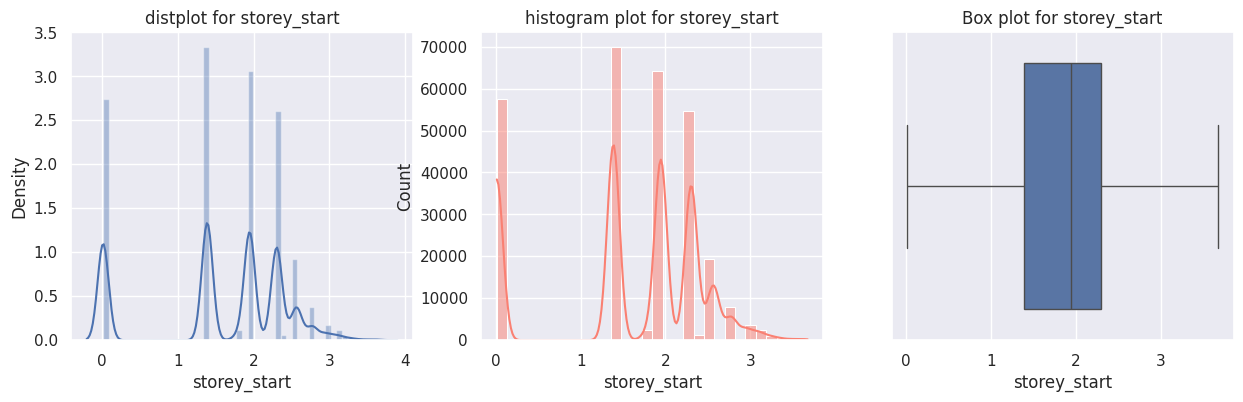

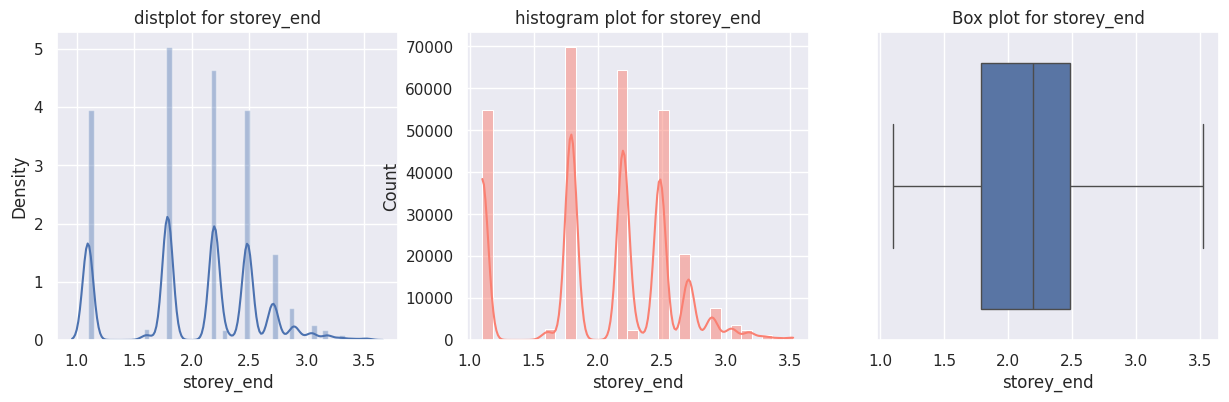

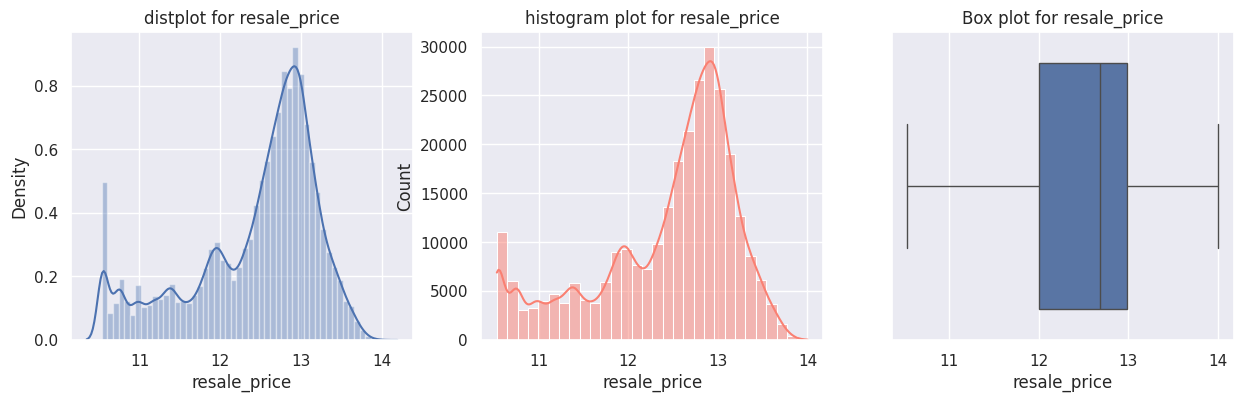

In [64]:
for k in outlier_columns:
    plot(df_real_og,k)

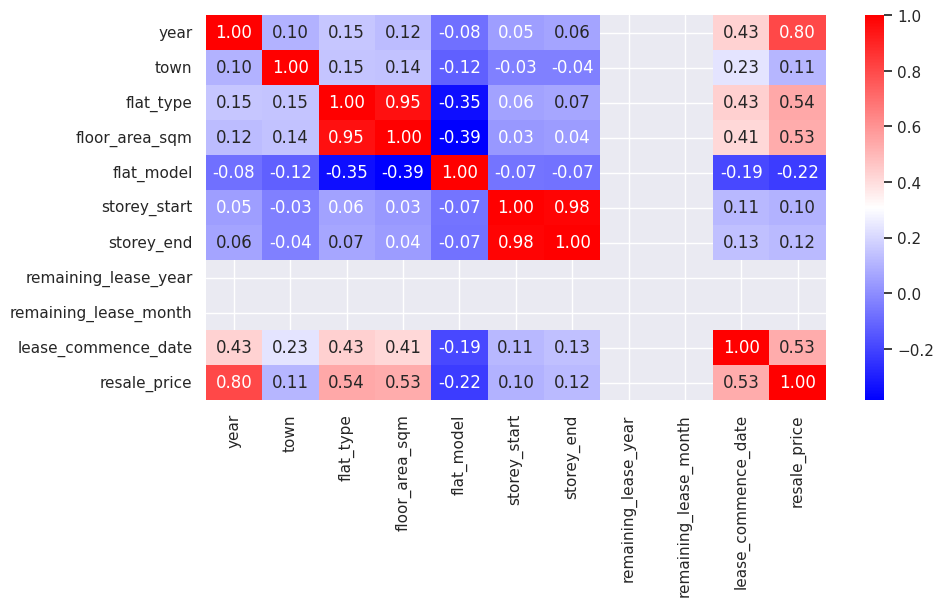

In [65]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_real_og.corr(), annot= True, cmap="bwr", fmt="0.2f")
plt.show()

In [66]:
df_real_og.describe().T

,count,mean,std,min,25%,50%,75%,max
year,286034.0,2006.654167,10.306904,1990.000000,2000.000000,2012.000000,2016.000000,2020.000000
town,286034.0,14.318997,9.430386,0.000000,5.000000,14.000000,24.000000,28.000000
flat_type,286034.0,2.992137,0.951766,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,286034.0,94.866030,25.683414,28.000000,70.000000,92.000000,111.000000,172.500000
flat_model,286034.0,8.073208,3.876296,0.000000,4.000000,7.000000,11.000000,19.000000
storey_start,286034.0,1.589014,0.901446,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,286034.0,2.023931,0.568157,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,286034.0,74.000000,0.000000,74.000000,74.000000,74.000000,74.000000,74.000000
remaining_lease_month,286034.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
lease_commence_date,286034.0,1987.831223,10.476005,1966.000000,1980.000000,1985.000000,1996.000000,2016.000000


In [67]:
# save the processed data for the deployment
df_real_og.to_csv('final.csv')

In [68]:
df_real_og.shape

(286034, 11)

In [77]:
df_real_og["lease_commence_date"]= df_real_og["lease_commence_date"].astype(int)
df_real_og["floor_area_sqm"]= df_real_og["floor_area_sqm"].astype(int)

In [78]:

# Reduce the number of rows by 50%
df_perfect = df_real_og.sample(frac=0.6)

# Print the shape of the reduced DataFrame
print(df_perfect.shape)


(171620, 11)


In [80]:
# save the processed data for the deployment
df_perfect.to_csv('lastfinal.csv')

In [79]:
df_perfect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171620 entries, 221979 to 9578
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   171620 non-null  int64  
 1   town                   171620 non-null  int64  
 2   flat_type              171620 non-null  int64  
 3   floor_area_sqm         171620 non-null  int64  
 4   flat_model             171620 non-null  int64  
 5   storey_start           171620 non-null  float64
 6   storey_end             171620 non-null  float64
 7   remaining_lease_year   171620 non-null  int64  
 8   remaining_lease_month  171620 non-null  int64  
 9   lease_commence_date    171620 non-null  int64  
 10  resale_price           171620 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 15.7 MB


In [81]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [82]:
# Train Test Split for model selection
def select_model(df_perfect, algorithm):
    # x, y spliting
    x= df_perfect.drop(columns=["resale_price"])
    y= df_perfect["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [83]:
select_model(df_perfect, LinearRegression)
select_model(df_perfect, DecisionTreeRegressor)
select_model(df_perfect, RandomForestRegressor)



{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.8438062267415649, 'Mean_squared_error': 0.0947007582620694, 'Root_mean_squared_error': 0.3077348830764387, 'Mean_absolute_error': 0.25568923828754725}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.8450226358083488, 'Mean_squared_error': 0.09453534852376058, 'Root_mean_squared_error': 0.30746601198142304, 'Mean_absolute_error': 0.2556136034668533}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9929382445030308, 'Mean_squared_error': 0.004281563767063974, 'Root_mean_squared_error': 0.06543365928223772, 'Mean_absolute_error': 0.031226345188303122}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9729366065879653, 'Mean_squared_error': 0.016508522659337947, 'Root_mean_squared_error': 0.1284854959103865, 'Mean_absolute_error': 0.08060660157804397}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.991741293814718, 'Mean_squared_error': 0.00500727

In [84]:
df_perfect.isnull().sum()

year                     0
town                     0
flat_type                0
floor_area_sqm           0
flat_model               0
storey_start             0
storey_end               0
remaining_lease_year     0
remaining_lease_month    0
lease_commence_date      0
resale_price             0
dtype: int64

In [85]:
df_perfect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171620 entries, 221979 to 9578
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   171620 non-null  int64  
 1   town                   171620 non-null  int64  
 2   flat_type              171620 non-null  int64  
 3   floor_area_sqm         171620 non-null  int64  
 4   flat_model             171620 non-null  int64  
 5   storey_start           171620 non-null  float64
 6   storey_end             171620 non-null  float64
 7   remaining_lease_year   171620 non-null  int64  
 8   remaining_lease_month  171620 non-null  int64  
 9   lease_commence_date    171620 non-null  int64  
 10  resale_price           171620 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 15.7 MB


In [86]:
# RandomForestClassifier is having quite good score,
# And it will detect the unseen data for this datas (without overfitting)
# so i choose it

#x,y spliting
x= df_perfect.drop(columns=["resale_price"])
y= df_perfect["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9797986414643571, 'Mean_squared_error': 0.012322718738839666, 'Root_mean_squared_error': 0.11100774179686598, 'Mean_absolute_error': 0.0712494196667131}


In [87]:
df_perfect.iloc[10456]

year                     1992.000000
town                       11.000000
flat_type                   2.000000
floor_area_sqm             59.000000
flat_model                  4.000000
storey_start                1.386294
storey_end                  1.791759
remaining_lease_year       74.000000
remaining_lease_month       3.000000
lease_commence_date      1977.000000
resale_price               11.082143
Name: 32295, dtype: float64

In [88]:
np.exp(11.082143)

65000.02932295131

In [90]:
user_data = np.array([[1992,11,2,59,4,1.386294,1.791759,74,3,1977]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

10.866664727631182

In [93]:
np.exp(10.82143)

50082.65402116232

In [94]:
import pickle
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [95]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [96]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.255057159003417

In [ ]:
import joblib
joblib.dump(model_1,'house_predict_model')

['house_predict_model']

In [ ]:
with open("house_predict_model","rb") as f1:
    regg_model= joblib.load(f1)

In [ ]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

10.799565060682964

In [ ]:
np.exp(12.721122890238338)

334744.51907764707

In [97]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [98]:
! pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 822.1/822.1 kB 7.6 MB/s eta 0:00:00


In [105]:
# prompt: how to update streamlit

!pip install --upgrade streamlit


In [116]:
%%writefile house_pred.py




# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import streamlit as st
from streamlit_option_menu import option_menu
from PIL import Image
import pickle
import base64

def town_mapping(town_map):
    if town_map == 'ANG MO KIO':
        town_1 = int(0)
    elif town_map == 'BEDOK':
        town_1 = int(1)
    elif town_map == 'BISHAN':
        town_1= int(2)
    elif town_map == 'BUKIT BATOK':
        town_1= int(3)
    elif town_map == 'BUKIT MERAH':
        town_1= int(4)
    elif town_map == 'BUKIT PANJANG':
        town_1= int(5)

    elif town_map == 'BUKIT TIMAH':
        town_1= int(6)
    elif town_map == 'CENTRAL AREA':
        town_1= int(7)
    elif town_map == 'CHOA CHU KANG':
        town_1= int(8)
    elif town_map == 'CLEMENTI':
        town_1= int(9)
    elif town_map == 'GEYLANG':
        town_1= int(10)

    elif town_map == 'HOUGANG':
        town_1 = int(11)
    elif town_map == 'JURONG EAST':
        town_1= int(12)
    elif town_map == 'JURONG WEST':
        town_1= int(13)
    elif town_map == 'KALLANG/WHAMPOA':
        town_1= int(14)
    elif town_map == 'MARINE PARADE':
        town_1= int(15)

    elif town == 'PASIR RIS':
        town_1= int(16)
    elif town == 'PUNGGOL':
        town_1= int(17)
    elif town == 'QUEENSTOWN':
        town_1= int(18)
    elif town == 'SEMBAWANG':
        town_1= int(19)
    elif town == 'SENGKANG':
        town_1= int(20)

    elif town == 'SERANGOON':
        town_1= int(21)
    elif town == 'TAMPINES':
        town_1= int(22)
    elif town == 'TOA PAYOH':
        town_1= int(23)
    elif town == 'WOODLANDS':
        town_1= int(24)
    elif town == 'YISHUN':
        town_1= int(25)

    return town_1

def flat_type_mapping(flt_type):

    if flt_type == '3 ROOM':
        flat_type_1= int(2)
    elif flt_type == '4 ROOM':
        flat_type_1= int(3)
    elif flt_type == '5 ROOM':
        flat_type_1= int(4)
    elif flt_type == '2 ROOM':
        flat_type_1= int(1)
    elif flt_type == 'EXECUTIVE':
        flat_type_1= int(5)
    elif flt_type == '1 ROOM':
        flat_type_1= int(0)
    elif flt_type == 'MULTI-GENERATION':
        flat_type_1= int(6)

    return flat_type_1

def flat_model_mapping(fl_m):

    if fl_m == 'Improved':
        flat_model_1= int(5)
    elif fl_m == 'New Generation':
        flat_model_1= int(12)

    elif fl_m == 'Model A':
        flat_model_1= int(8)
    elif fl_m == 'Standard':
        flat_model_1= int(17)
    elif fl_m == 'Simplified':
        flat_model_1= int(16)
    elif fl_m == 'Premium Apartment':
        flat_model_1= int(13)
    elif fl_m == 'Maisonette':
        flat_model_1= int(7)

    elif fl_m == 'Apartment':
        flat_model_1= int(3)
    elif fl_m == 'Model A2':
        flat_model_1= int(10)
    elif fl_m == 'Type S1':
        flat_model_1= int(19)
    elif fl_m == 'Type S2':
        flat_model_1= int(20)
    elif fl_m == 'Adjoined flat':
        flat_model_1= int(2)

    elif fl_m == 'Terrace':
        flat_model_1= int(18)
    elif fl_m == 'DBSS':
        flat_model_1= int(4)
    elif fl_m == 'Model A-Maisonette':
        flat_model_1= int(9)
    elif fl_m == 'Premium Maisonette':
        flat_model_1= int(15)
    elif fl_m == 'Multi Generation':
        flat_model_1= int(11)

    elif fl_m == 'Premium Apartment Loft':
        flat_model_1= int(14)
    elif fl_m == 'Improved-Maisonette':
        flat_model_1= int(6)
    elif fl_m == '2-room':
        flat_model_1= int(0)
    elif fl_m == '3Gen':
        flat_model_1= int(1)

    return flat_model_1


def predict_price(year,town,flat_type,flr_area_sqm,flat_model,stry_start,stry_end,re_les_year,
              re_les_month,les_coms_dt):

    year_1= int(year)
    town_2= town_mapping(town)
    flt_ty_2= flat_type_mapping(flat_type)
    flr_ar_sqm_1= int(flr_area_sqm)
    flt_model_2= flat_model_mapping(flat_model)
    str_str= np.log(int(stry_start))
    str_end= np.log(int(stry_end))
    rem_les_year= int(re_les_year)
    rem_les_month= int(re_les_month)
    lese_coms_dt= int(les_coms_dt)


    with open(r"/content/Resale_Flat_Prices_Model_1.pkl","rb") as f:
        regg_model= pickle.load(f)

    user_data = np.array([[year_1,town_2,flt_ty_2,flr_ar_sqm_1,
                           flt_model_2,str_str,str_end,rem_les_year,rem_les_month,
                           lese_coms_dt]])
    y_pred_1 = regg_model.predict(user_data)
    price= np.exp(y_pred_1[0])

    return round(price)



st.set_page_config(layout="wide")
# Set the primary color
st.markdown(
    """
    <style>
    .stButton {
        background-color: #7F7F7F;
        color: #000000;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Set the text color
st.markdown(
    """
    <style>
    .stText {
        color: #0e1a10;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Set the background color
st.markdown(
    """
    <style>
    .stApp {
        background-color: #818589;
    }
    </style>
    """,
    unsafe_allow_html=True
)
st.markdown(
    """
    <style>
    .stText {
        font-family: Arial;
        font-size: 20px;
    }
    </style>
    """,
    unsafe_allow_html=True
)
st.title("SINGAPORE RESALE FLAT PRICES PREDICTING")
st.write("")

st.markdown(
    """
    <style>
    .stSidebar {
        background-color: #02360c;
    }
    </style>
    """,
    unsafe_allow_html=True
)
with st.sidebar:
    select= option_menu("MAIN MENU",["HOME", "PRICE PREDICTOR"])

if select == "HOME":
    # Open the image file
    img = Image.open(r"/content/singaporeeeee.png")

    # Display the image in the center and medium size
    st.image(img, caption='Singapore', use_column_width=True, output_format='auto')

    st.header("INTRODUCTION:")

    st.write('''In the bustling real estate market of Singapore, accurately predicting resale flat prices can be a game-changer. This project delves into the intricacies of machine learning, data preprocessing, and exploratory analysis to provide insights into resale prices based on historical transaction data and key features.''')

    st.header("DATA COLLECTION AND PREPROCESSING:")

    st.write(''' Collected resale flat transaction data from the Singapore Housing and Development Board (HDB) spanning from 1990 to the present.
              Preprocessed the data by handling missing values, removing duplicates, and converting data types as necessary''')

    st.header("FEATURE ENGINEERING:")

    st.write('''Extracted relevant features such as town, flat type, storey range, floor area, flat model, lease commence date, etc.
              Created additional features like price per square meter, years holding, and current remaining lease to enhance prediction accuracy.''')

    st.header("EXPLORATORY DATA ANALYSIS (EDA):")

    st.write('''Conducted EDA to gain insights into the data through basic statistics, visualizations, and univariate/bivariate analysis.
              Explored trends and relationships between different features and resale prices using various plots and charts.''')

    st.header("MODEL BUILDING AND EVALUATION:")

    st.write('''Selected multiple regression models including Linear Regression, Decision Trees, and K-Nearest Neighbors.
                Constructed pipelines for preprocessing and model training.
                Evaluated model performance using regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score.
                Chose the Decision Trees model due to its superior performance.''')

    st.header("CONCLUSION AND DEPLOYMENT:")

    st.write("Deployed the Streamlit app to provide real-time resale price predictions for users navigating Singapore's real estate market")


elif select == "PRICE PREDICTOR":

    col1,col2= st.columns(2)
    with col1:

        year= st.selectbox("Select the Year",["2015", "2016", "2017", "2018", "2019", "2020", "2021",
                           "2022", "2023", "2024"])

        town= st.selectbox("Select the Town", ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
                                            'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
                                            'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
                                            'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
                                            'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
                                            'TOA PAYOH', 'WOODLANDS', 'YISHUN'])

        flat_type= st.selectbox("Select the Flat Type", ['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
                                                        'MULTI-GENERATION'])

        flr_area_sqm= st.number_input("Enter the Value of Floor Area sqm (Min: 31 / Max: 280")

        flat_model= st.selectbox("Select the Flat Model", ['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
                                                        'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
                                                        'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
                                                        'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
                                                        'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'])

    with col2:

        stry_start= st.number_input("Enter the Value of Storey Start")

        stry_end= st.number_input("Enter the Value of Storey End")

        re_les_year= st.number_input("Enter the Value of Remaining Lease Year (Min: 42 / Max: 97)")

        re_les_month= st.number_input("Enter the Value of Remaining Lease Month (Min: 0 / Max: 11)")

        les_coms_dt= st.selectbox("Select the Lease_Commence_Date", [str(i) for i in range(1966,2023)])

    button= st.button("Predict the Price", use_container_width= True)

    if button:


        pre_price= predict_price(year, town, flat_type, flr_area_sqm, flat_model,
                        stry_start, stry_end, re_les_year, re_les_month, les_coms_dt)

        st.write("## :grey[**The Predicted Price is :**]",pre_price)






Overwriting house_pred.py


In [114]:
! wget -q -O - ipv4.icanhazip.com

34.74.109.218


In [115]:
! streamlit run house_pred.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.109.218:8501

npx: installed 22 in 2.575s
your url is: https://ripe-moments-deny.loca.lt
2024-04-02 10:57:43.570 Session with id 79e8dbdb-7006-4db1-a2c0-0ac8868b173c is already connected! Connecting to a new session.
  Stopping...
^C


In [ ]:
# prompt: how to change the background color  in streamlit

st.markdown(
    """
    <style>
    .reportview-container {
        background: url("https://images.unsplash.com/photo-1501785888041-af3ef285b470?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8cmVhbCUyMGVzdGF0ZXxlbnwwfHwwfHw%3D&w=1000&q=80")
    }
    </style>
    """,
    unsafe_allow_html=True
)


In [112]:
# prompt: how to chnage font style in streamlit

st.markdown(
    """
    <style>
    .stText {
        font-family: Arial;
    }
    </style>
    """,
    unsafe_allow_html=True
)


NameError: name 'st' is not defined